In [1]:
import tensorflow as tf
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.optimizers import adam_v2
from keras.utils.vis_utils import plot_model
from sklearn.model_selection  import train_test_split


import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 


import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

plt.style.use('seaborn')

import seaborn as sns

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import gensim
import os
import re

sns.set_style("whitegrid")

In [2]:
train = pd.read_csv('train.csv')
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
#Considering only comments having some toxicity
train = train.loc[(train['toxic'] == 1) | (train['severe_toxic'] == 1) | (train['obscene'] ==1) | (train['threat'] == 1) | (train['insult'] == 1) | (train['identity_hate'] ==1)]

train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
44,001956c382006abd,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0,0,0,0,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0
58,0021fe88bc4da3e6,My Band Page's deletion. You thought I was gon...,1,0,1,0,0,0


In [4]:
# Importing the Stopwords.
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for i in range(ord('a'),ord('z')+1):
    stop_words.add(chr(i))

In [5]:
# Stemming and Lemmatizing
from nltk.stem import WordNetLemmatizer, PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [6]:
totalContentCleaned = []
newComments = []
punctList = {}
for punct in string.punctuation:
    punctList[punct] = None
transString = str.maketrans(punctList)
# Remove punctuation with ''
for sen in train['comment_text']:
    word_list = []
    for word in sen.split():
        if not word in stop_words:
            word_list.append(stemmer.stem(lemmatizer.lemmatize(word,pos="v")))
    totalContentCleaned = " ".join(word_list)
    # print(totalContentCleaned)
    newComments.append(totalContentCleaned.translate(transString))

# print(newComments)
train['comment_text'] = newComments
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,cocksuck befor you piss around on my work,1,1,1,0,1,0
12,0005c987bdfc9d4b,hey it talk what it exclus group wp taliban...,1,0,0,0,0,0
16,0007e25b2121310b,bye dont look come think com back tosser,1,0,0,0,0,0
42,001810bf8c45bf5f,you gay antisemmitian archangel white tiger me...,1,0,1,0,1,1
43,00190820581d90ce,fuck your filthi mother in the ass dry,1,0,1,0,1,0
44,001956c382006abd,im sorri im sorri i screw around someon talk p...,1,0,0,0,0,0
51,001dc38a83d420cf,get fuck up get fuckee up got a drink that you...,1,0,1,0,0,0
55,0020e7119b96eeeb,stupid peac shit stop delet stuff asshol go di...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,toni sidaway obvious fistfuckee he love arm ass,1,0,1,0,1,0
58,0021fe88bc4da3e6,my band page deletion you think i gone delet c...,1,0,1,0,0,0


In [7]:
df_test = pd.read_csv('test.csv')
df_test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [8]:
df_test_labels = pd.read_csv('test_labels.csv')

df_test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


In [9]:
test_labels = df_test_labels[(df_test_labels[['toxic','severe_toxic', 'obscene', 'threat', 
                                        'insult', 'identity_hate']] != -1).all(axis=1)]
test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0
16,000663aff0fffc80,0,0,0,0,0,0
17,000689dd34e20979,0,0,0,0,0,0
19,000844b52dee5f3f,0,0,0,0,0,0
21,00091c35fa9d0465,1,0,0,0,0,0
22,000968ce11f5ee34,0,0,0,0,0,0


In [10]:
test = pd.merge(test_labels, df_test, on='id', how='inner')
test.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,0001ea8717f6de06,0,0,0,0,0,0,Thank you for understanding. I think very high...
1,000247e83dcc1211,0,0,0,0,0,0,:Dear god this site is horrible.
2,0002f87b16116a7f,0,0,0,0,0,0,"""::: Somebody will invariably try to add Relig..."
3,0003e1cccfd5a40a,0,0,0,0,0,0,""" \n\n It says it right there that it IS a typ..."
4,00059ace3e3e9a53,0,0,0,0,0,0,""" \n\n == Before adding a new product to the l..."
5,000663aff0fffc80,0,0,0,0,0,0,this other one from 1897
6,000689dd34e20979,0,0,0,0,0,0,== Reason for banning throwing == \n\n This ar...
7,000844b52dee5f3f,0,0,0,0,0,0,|blocked]] from editing Wikipedia. |
8,00091c35fa9d0465,1,0,0,0,0,0,"== Arabs are committing genocide in Iraq, but ..."
9,000968ce11f5ee34,0,0,0,0,0,0,Please stop. If you continue to vandalize Wiki...


In [11]:
test = test.loc[(test['toxic'] == 1) | (test['severe_toxic'] == 1) | (test['obscene'] ==1) | (test['threat'] == 1) | (test['insult'] == 1) | (test['identity_hate'] ==1)]

test.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
8,00091c35fa9d0465,1,0,0,0,0,0,"== Arabs are committing genocide in Iraq, but ..."
24,0013fed3aeae76b7,1,0,1,0,1,1,DJ Robinson is gay as hell! he sucks his dick ...
29,0017d4d47894af05,1,0,1,0,1,0,":Fuck off, you anti-semitic cunt. |"
38,001d739c97bc2ae4,1,0,0,0,0,0,How dare you vandalize that page about the HMS...
40,001eff4007dbb65b,1,0,1,0,1,0,"::No, he is an arrogant, self serving, immatur..."
89,005f47397e07e12f,1,0,0,0,0,0,":Eek, but shes cute in an earthy kind of way. ..."
106,0071940212267fea,1,0,1,0,0,0,"::::Well, it sucks to have a university to be ..."
107,0072b9c3697ab8cc,1,0,1,0,1,0,== Argh == \n\n Some random idiot deleted the ...
124,0081b14d79f54b31,1,0,1,1,0,0,(we hate america and we are going to bomb the ...
125,00842d1024b19972,1,0,1,0,1,0,== Bold textYOU SUCK!!! == \n\n \n\n U SUCK H...


In [12]:
#Cleaning the test data
totalContentCleaned = []
newComments = []
punctDict = {}
for punct in string.punctuation:
    punctDict[punct] = None
transString = str.maketrans(punctDict)
# since we intent to remove any punctuation with ''
for sen in test['comment_text']:
    word_list = []
    for word in sen.split():
        if not word in stop_words:
            word_list.append(stemmer.stem(lemmatizer.lemmatize(word,pos="v")))
    totalContentCleaned = " ".join(word_list)
    # print(totalContentCleaned)
    newComments.append(totalContentCleaned.translate(transString))

# print(newComments)
test['comment_text'] = newComments
test.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
8,00091c35fa9d0465,1,0,0,0,0,0,arab commit genocid iraq protest europe may ...
24,0013fed3aeae76b7,1,0,1,0,1,1,dj robinson gay hell suck dick much
29,0017d4d47894af05,1,0,1,0,1,0,fuck off antisemit cunt
38,001d739c97bc2ae4,1,0,0,0,0,0,how dare vandal page hm beagle dont vandal aga...
40,001eff4007dbb65b,1,0,1,0,1,0,no arrogant self serving immatur idiot get right
89,005f47397e07e12f,1,0,0,0,0,0,eek she cute earthi kind way cant sing shit th...
106,0071940212267fea,1,0,1,0,0,0,well suck univers nicknameless and first time ...
107,0072b9c3697ab8cc,1,0,1,0,1,0,argh some random idiot delet whole japan art...
124,0081b14d79f54b31,1,0,1,1,0,0,we hate america go bomb shit cities queza rain
125,00842d1024b19972,1,0,1,0,1,0,bold textyou suck u suck hannah montana


In [13]:
print("Train data shape", train.shape)
print("Test data shape", test.shape)

Train data shape (16225, 8)
Test data shape (6243, 8)


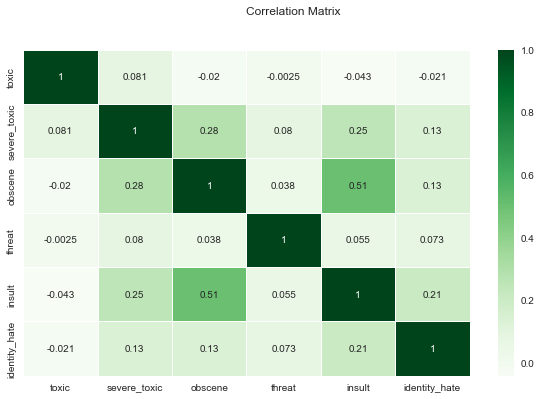

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(train.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

In [15]:
#Convert text to vectors using keras preprocessing library tools

X_train = train["comment_text"].values
X_test  = test["comment_text"].values

y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
y_test  = test[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [16]:
num_words = 20000 #Max. words to use per toxic comment used in Tokenizer
max_len = 200 #Max. number of words per toxic comment to be use
embedding_dims = 128 #embedding vector output dimension 
num_epochs = 10 # Number of times dataset is exposed to model 
batch_size = 256 

In [17]:
#toxic comments Tokenization
tokenizer = tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized toxic commnent to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
 
# padding the sequences
X_train = sequence.pad_sequences(X_train, max_len)
X_test  = sequence.pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (16225, 200)
X_test shape:  (6243, 200)


In [18]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, train_size =0.8, random_state=233)

In [19]:
toxicComments_lines = list()
toxicComment_lines = train['comment_text'].values.tolist()

16225

In [20]:
#train word2vec mode
embedding_dims = 100 #embedding vector output dimension 
max_len = 200 #Max. number of words per toxic comment to be use
word2VecModel = gensim.models.Word2Vec(sentences=toxicComments_lines, window=5, workers=4, min_count=1)
words = list(word2VecModel.wv.index_to_key)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 33463


In [21]:
#save model
filename = 'toxic_embedding_word2vec.txt'
word2VecModel.wv.save_word2vec_format(filename, binary=False)

In [22]:
word2Vec_embeddings_index = {}
word2vec_file = open(os.path.join('', 'toxic_embedding_word2vec.txt'), encoding = "utf-8")

for line in word2vec_file:
    values = line.split()
    word = values[0]
    coefficient = np.asarray(values[1:])
    word2Vec_embeddings_index[word] = coefficient
word2vec_file.close()

In [23]:
#vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(toxicComments_lines)
sequences = tokenizer_obj.texts_to_sequences(toxicComments_lines)

#pad sequences
word_index = tokenizer_obj.word_index
print('Found %s uniquue tokens.' % len(word_index))

toxicComments_pad = pad_sequences(sequences, maxlen=max_len)
comments_tag = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
print('Shape of toxic comments tensor', toxicComments_pad.shape)
print('Shape of comment tensor', comments_tag.shape)

Found 33463 uniquue tokens.
Shape of toxic comments tensor (16225, 200)
Shape of comment tensor (16225, 6)


In [24]:
num_words = len(word_index)+1
word2Vec_embedding_matrix = np.zeros((num_words, embedding_dims))

for word, i  in word_index.items():
    if i > num_words:
        continue
    word2Vec_embedding_vector = word2Vec_embeddings_index.get(word)
    if word2Vec_embedding_vector is not None:
        #words not found in embedding index will be all-zeros.
        word2Vec_embedding_matrix[i] = word2Vec_embedding_vector

print(num_words)
print(word2Vec_embedding_matrix.shape[0])
print(word2Vec_embedding_matrix.shape[1])

33464
33464
100


In [25]:
LSTM_Word2Vec_model = Sequential([
    Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    LSTM(25, return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

LSTM_Word2Vec_model.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(0.01), metrics=['accuracy'])

In [26]:
LSTM_Word2Vec_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          3346400   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 200, 25)           12600     
                                                                 
 batch_normalization (BatchN  (None, 200, 25)          100       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 200, 25)           0         
                                                                 
 global_max_pooling1d (Globa  (None, 25)               0

In [27]:
LSTM_Word2Vec_model_fit = LSTM_Word2Vec_model.fit(X_tra, y_tra, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val, y_val))

Epoch 1/10
51/51 [==============================] - 69s 1s/step - loss: 0.5009 - accuracy: 0.9068 - val_loss: 0.5776 - val_accuracy: 0.9260
Epoch 2/10
51/51 [==============================] - 46s 906ms/step - loss: 0.3914 - accuracy: 0.9421 - val_loss: 0.5495 - val_accuracy: 0.9270
Epoch 3/10
51/51 [==============================] - 48s 943ms/step - loss: 0.3874 - accuracy: 0.9421 - val_loss: 0.5329 - val_accuracy: 0.9273
Epoch 4/10
51/51 [==============================] - 43s 838ms/step - loss: 0.3862 - accuracy: 0.9421 - val_loss: 0.5050 - val_accuracy: 0.9279
Epoch 5/10
51/51 [==============================] - 53s 1s/step - loss: 0.3762 - accuracy: 0.9421 - val_loss: 0.4592 - val_accuracy: 0.9285
Epoch 6/10
51/51 [==============================] - 44s 863ms/step - loss: 0.3696 - accuracy: 0.9421 - val_loss: 0.4522 - val_accuracy: 0.9291
Epoch 7/10
51/51 [==============================] - 49s 952ms/step - loss: 0.3657 - accuracy: 0.9418 - val_loss: 0.4242 - val_accuracy: 0.9319
Epoch

In [28]:
#train
LSTM_Word2Vec_train_score = LSTM_Word2Vec_model.evaluate(X_train, y_train, batch_size=batch_size, verbose=1)
print('Train Loss:', LSTM_Word2Vec_train_score[0])
print('Train Accuracy:', LSTM_Word2Vec_train_score[1])

#test
LSTM_Word2Vec_test_score = LSTM_Word2Vec_model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Test Loss:', LSTM_Word2Vec_test_score[0])
print('Test Accuracy:', LSTM_Word2Vec_test_score[1])

64/64 [==============================] - 18s 272ms/step - loss: 0.4046 - accuracy: 0.9276
Train Loss: 0.4045567214488983
Train Accuracy: 0.9275808930397034
25/25 [==============================] - 6s 254ms/step - loss: 0.4051 - accuracy: 0.9624
Test Loss: 0.4050576984882355
Test Accuracy: 0.9623578190803528


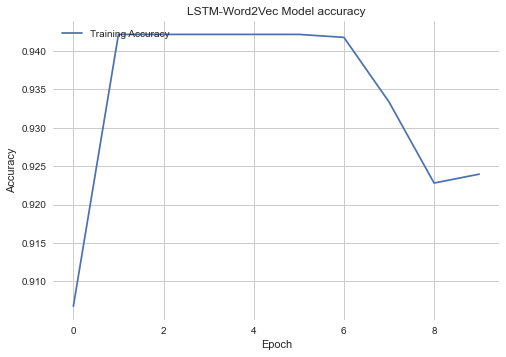

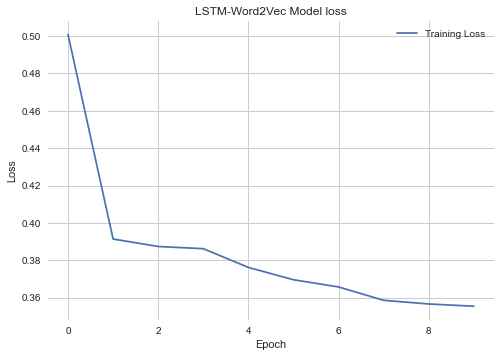

In [29]:
### Plot Training & Validation Accuracy with the Loss values of the LSTM-Glove Model# Plot training & validation accuracy values
plt.plot(LSTM_Word2Vec_model_fit.history['accuracy'])
# plt.plot(LSTM_Word2Vec_model_fit.history['val_acc'])
plt.title('LSTM-Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(LSTM_Word2Vec_model_fit.history['loss'])
plt.title('LSTM-Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss'], loc='upper right')
plt.show()